In [37]:
# Agrega el enlace de "Open in Colab" con el enlace correcto al archivo del notebook
# IMPORTANTE: reemplazar "tu_usuario", "tu_repositorio" y "nombre_del_notebook" con la información correspondiente a tu repositorio y al nombre del notebook que estás modificando.
open_in_colab_link = "https://colab.research.google.com/github/watorres/Predict_students_dropout_and_academic_success/blob/master/03-Notebook_informe_final.ipynb"

# Muestra el botón "Open in Colab"
print(f"Abre este notebook en Colab: [![Open In Colab]({open_in_colab_link})](https://colab.research.google.com/github)")

Abre este notebook en Colab: [![Open In Colab](https://colab.research.google.com/github/watorres/Predict_students_dropout_and_academic_success/blob/master/03-Notebook_informe_final.ipynb)](https://colab.research.google.com/github)


In [2]:
!git clone https://github.com/floydwch/kaggle-cli.git

Cloning into 'kaggle-cli'...
remote: Enumerating objects: 465, done.
remote: Total 465 (delta 0), reused 0 (delta 0), pack-reused 465
Receiving objects: 100% (465/465), 62.41 KiB | 4.80 MiB/s, done.
Resolving deltas: 100% (270/270), done.


In [3]:
cd kaggle-cli

/content/kaggle-cli


In [4]:
!python setup.py install

running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based t

In [5]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle


In [6]:
#Se sube el kaggle.json de Kaggle para conectar con la página web y descargar el archivo a trabajar
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"williamtorresza","key":"b956ae66effd6560c7e668e8171edf21"}'}

In [7]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
#Se baja el archivo dataset comprimido directamente desde Kaggle
!kaggle datasets download -d thedevastator/higher-education-predictors-of-student-retention
!unzip higher-education-predictors-of-student-retention.zip

  0% 0.00/87.2k [00:00<?, ?B/s]
100% 87.2k/87.2k [00:00<00:00, 42.6MB/s]
Archive:  higher-education-predictors-of-student-retention.zip
  inflating: dataset.csv             


In [9]:
#Se descomprime el archivo bajado desde Kaggle
!unzip -l higher-education-predictors-of-student-retention.zip

Archive:  higher-education-predictors-of-student-retention.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   470858  2023-01-03 09:18   dataset.csv
---------                     -------
   470858                     1 file


# **EXPLORACIÓN INICIAL DE LOS DATOS ORIGINALES DE KAGGLE (SIN PRE-PROCESO DE DATOS AÚN)**

In [10]:
import pandas as pd

# Cargar el archivo CSV
data = pd.read_csv('dataset.csv')

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(data.head())

# Obtener información general del dataset
print("\nInformación del dataset:")
print(data.info())

# Calcular estadísticas descriptivas del dataset
print("\nEstadísticas descriptivas del dataset:")
print(data.describe())

# Contar los valores únicos en cada columna
print("\nValores únicos en cada columna:")
for column in data.columns:
    unique_values = data[column].nunique()
    print(f"{column}: {unique_values} valores únicos")

# Mostrar la cantidad de valores faltantes en cada columna
print("\nValores faltantes en cada columna:")
print(data.isnull().sum())

Primeras filas del dataset:
   Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...

In [11]:
print(data.columns)


Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [12]:
numeric_columns = ['Application order', 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)']

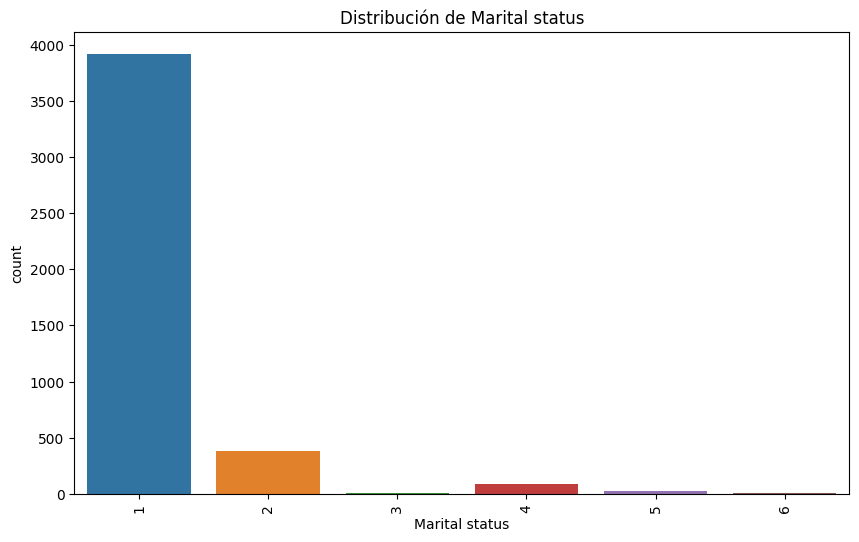

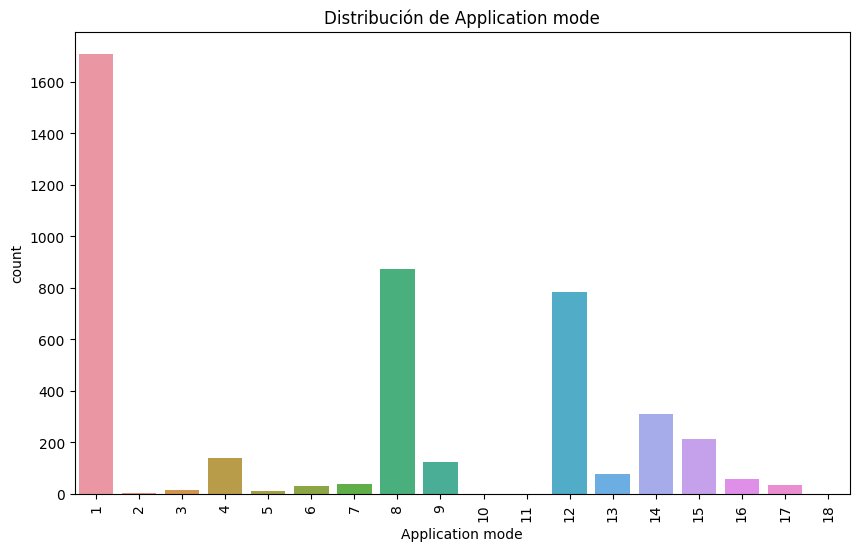

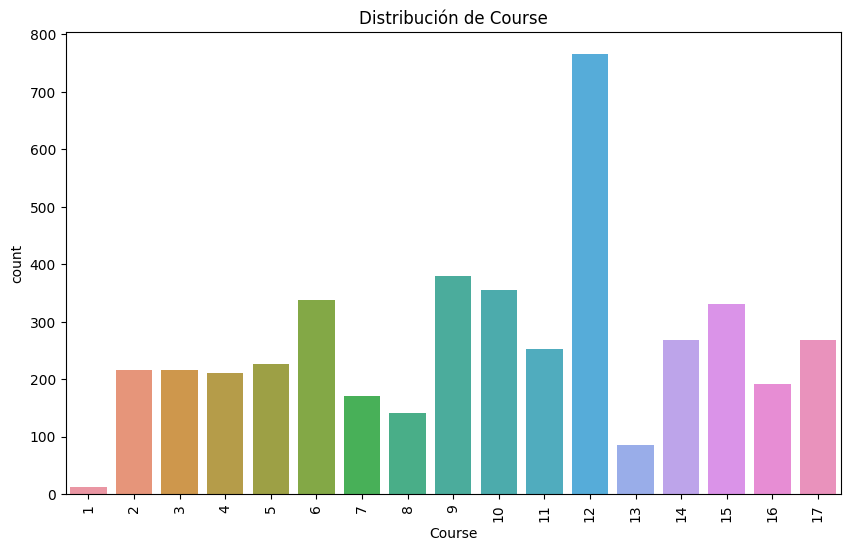

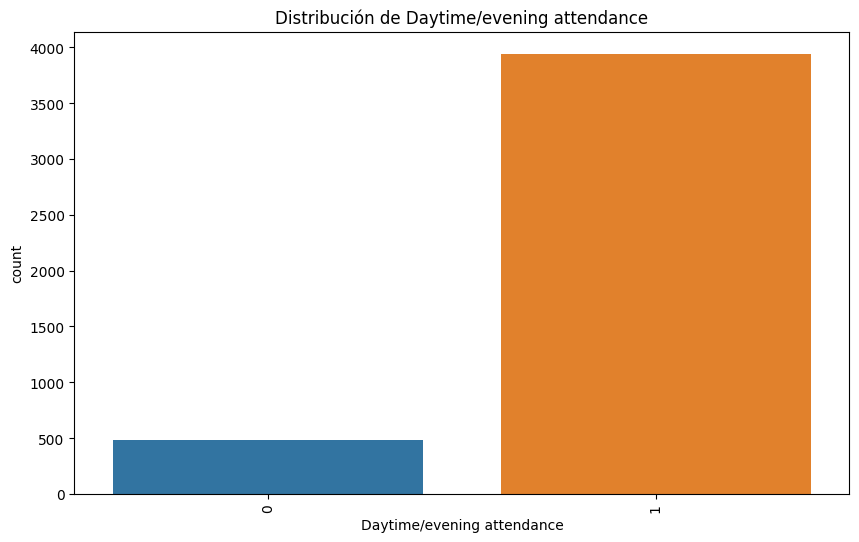

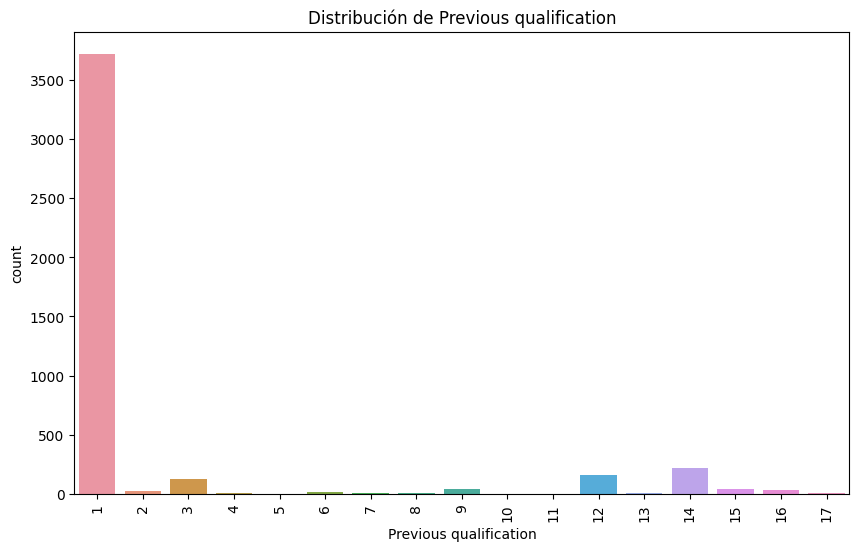

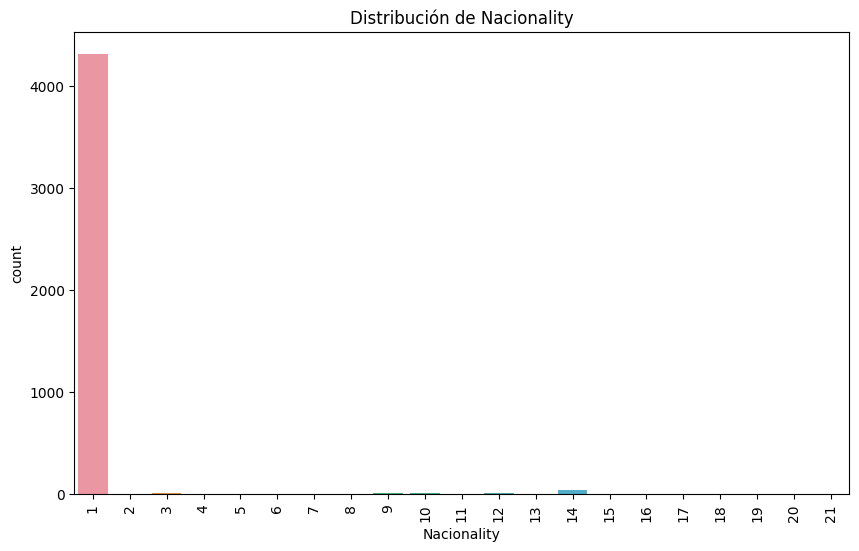

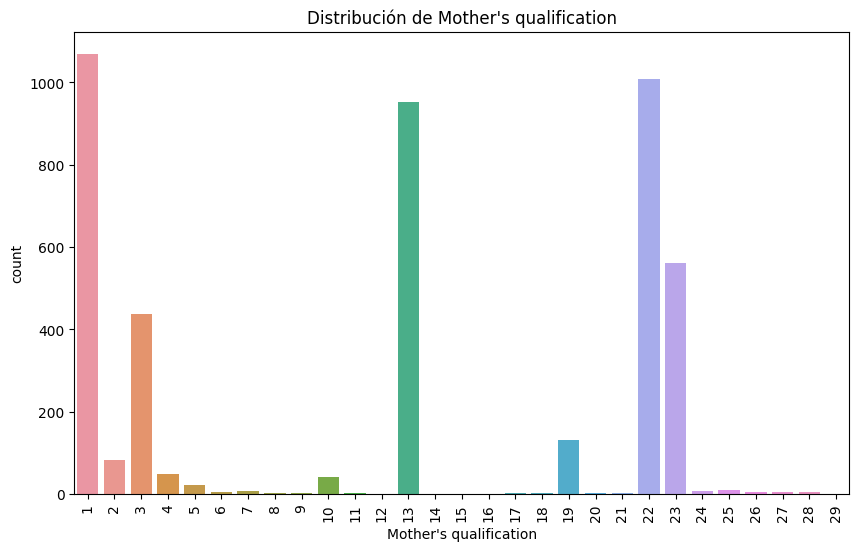

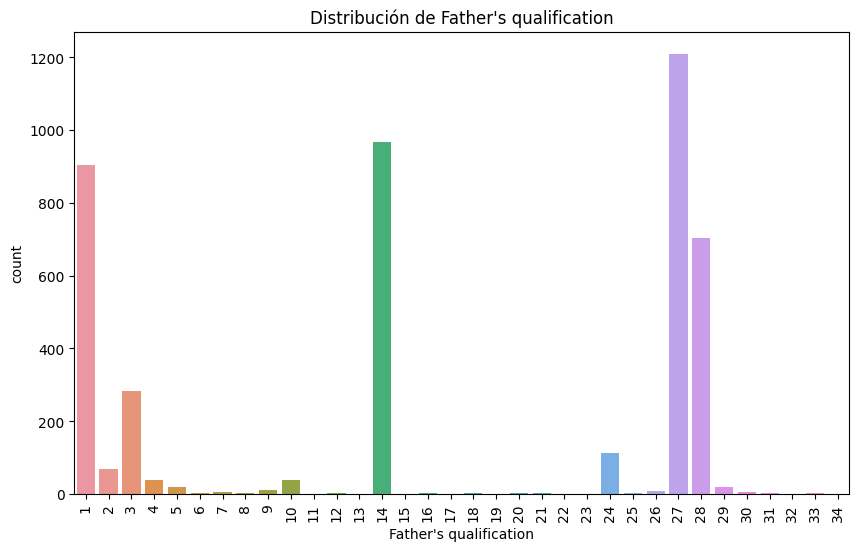

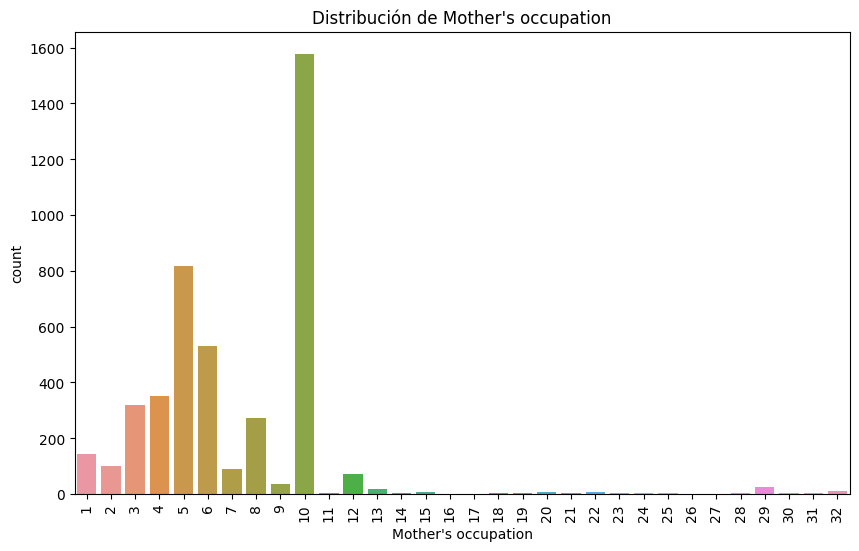

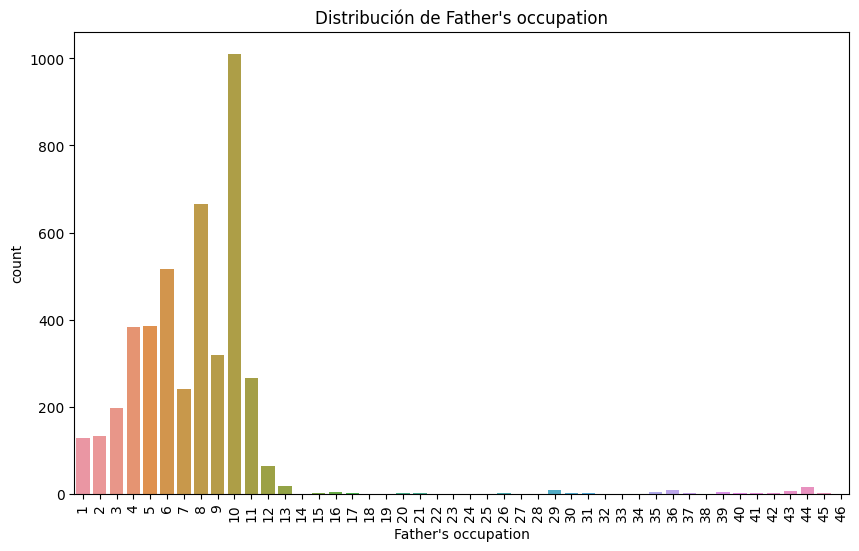

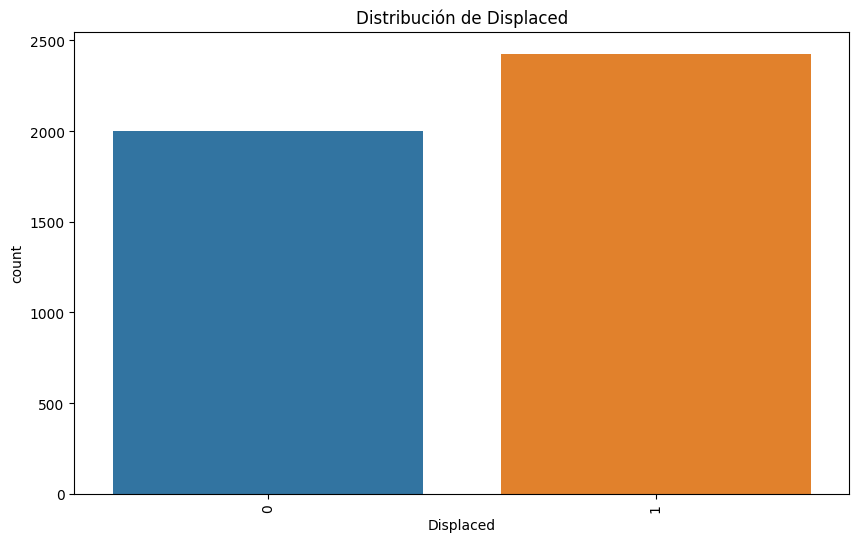

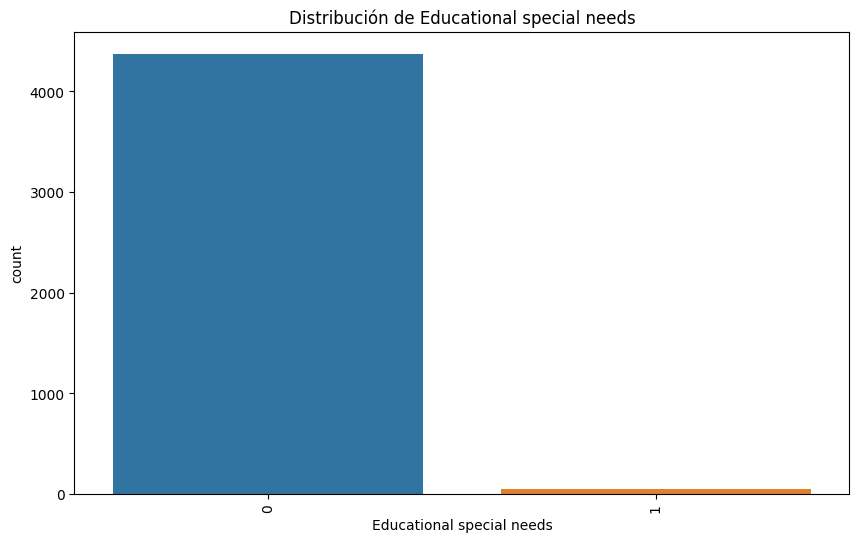

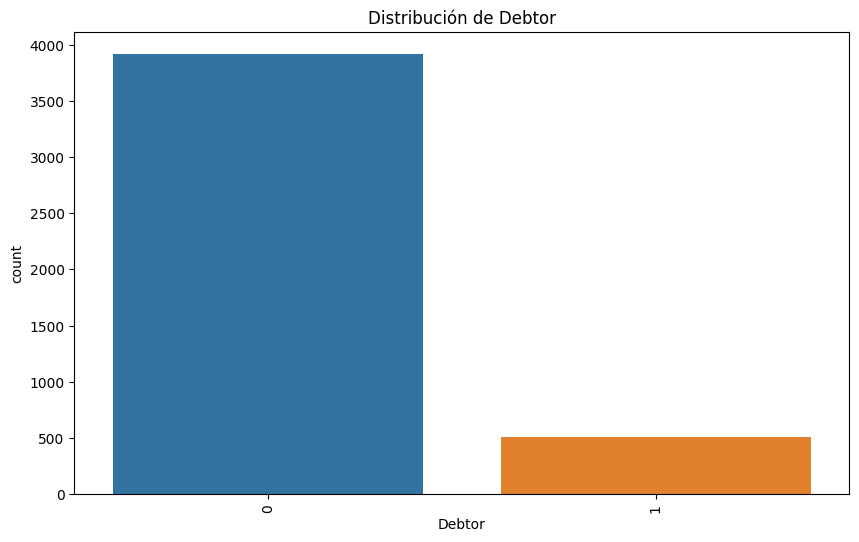

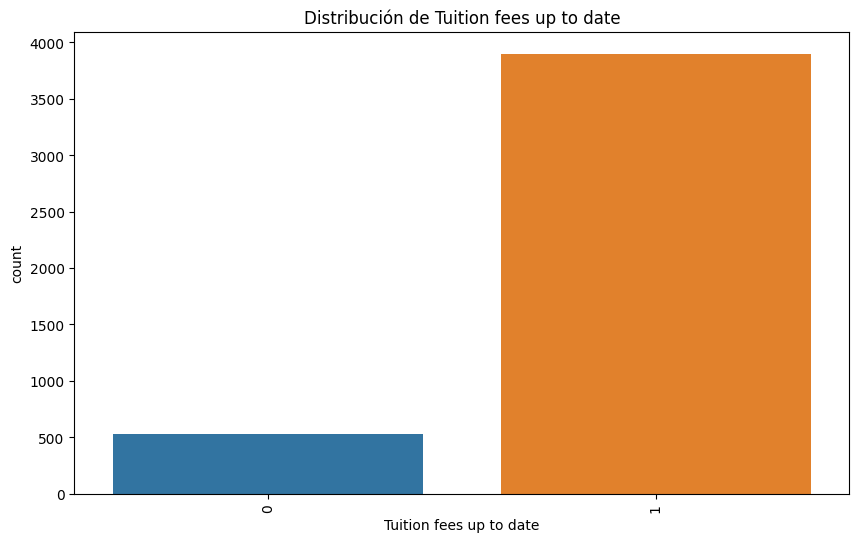

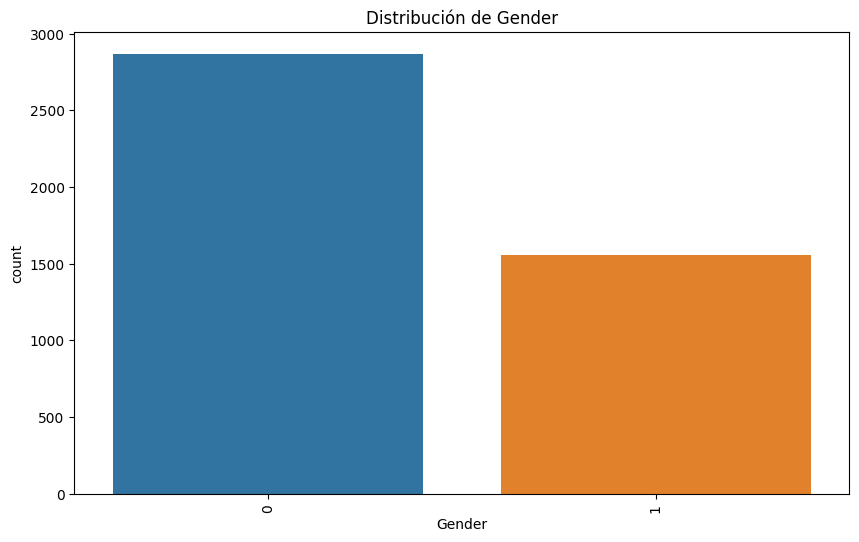

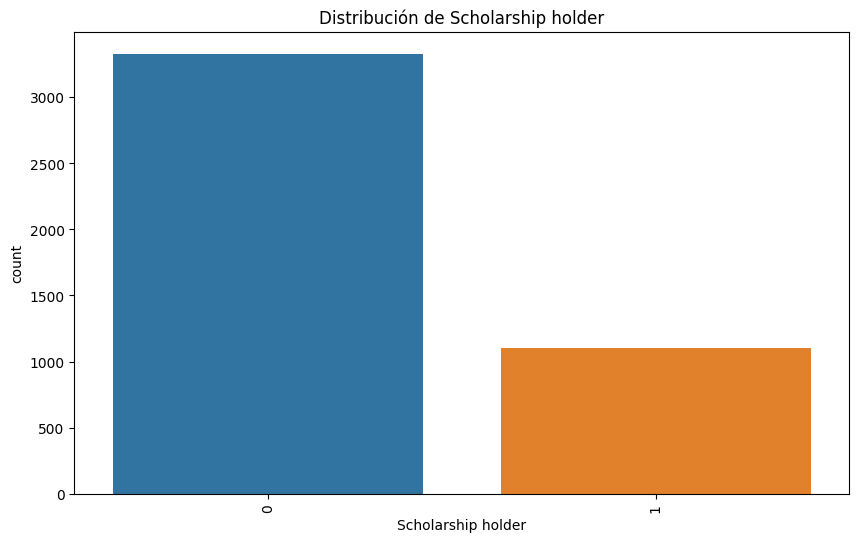

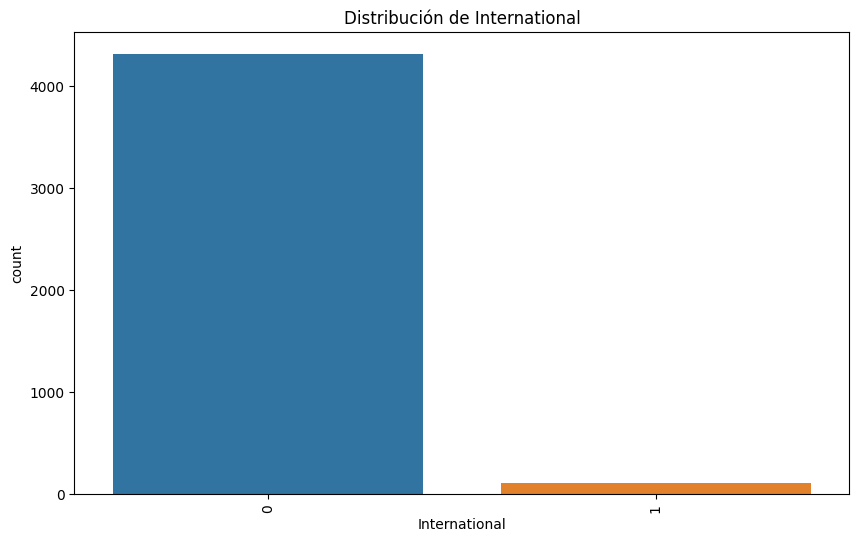

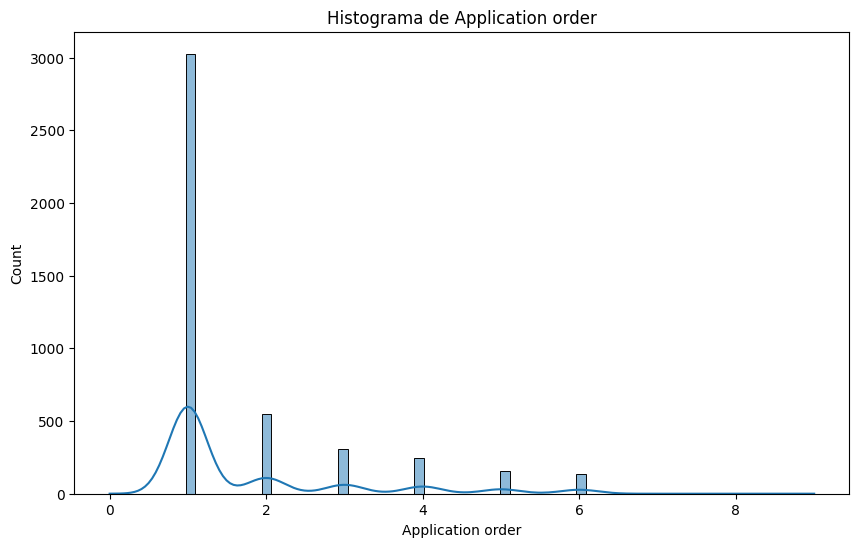

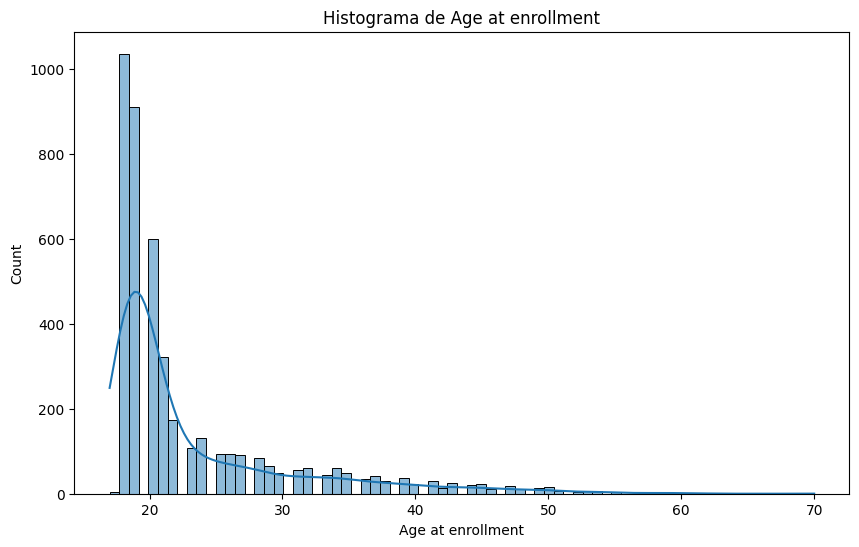

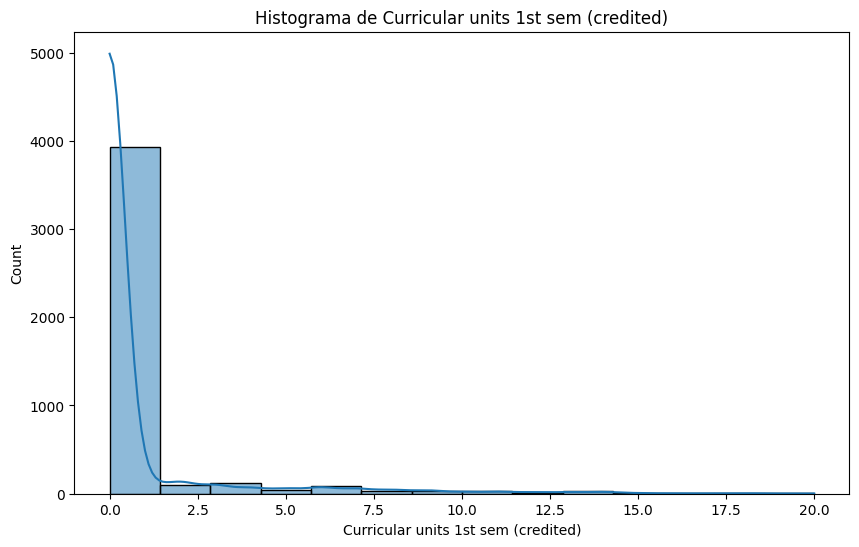

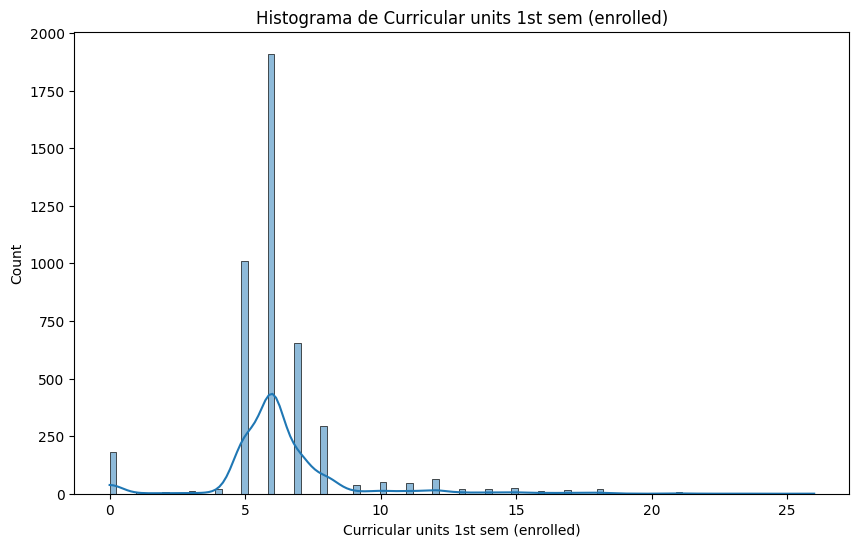

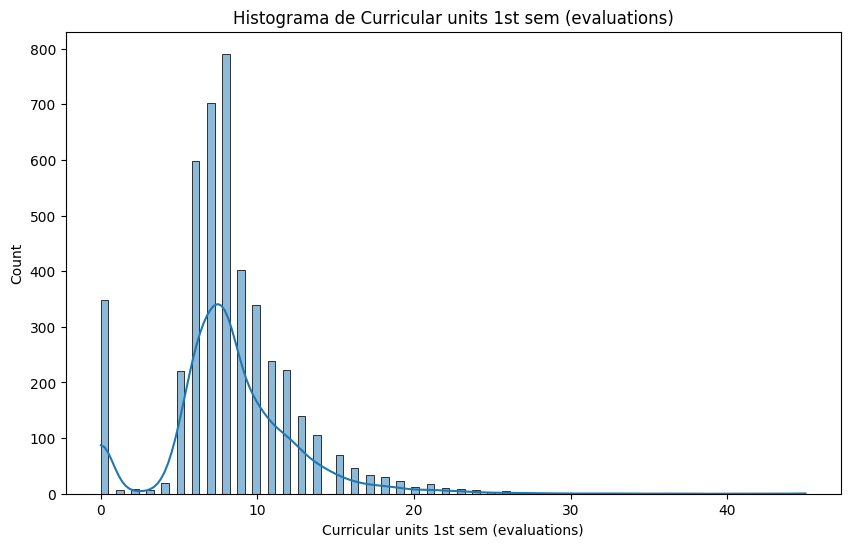

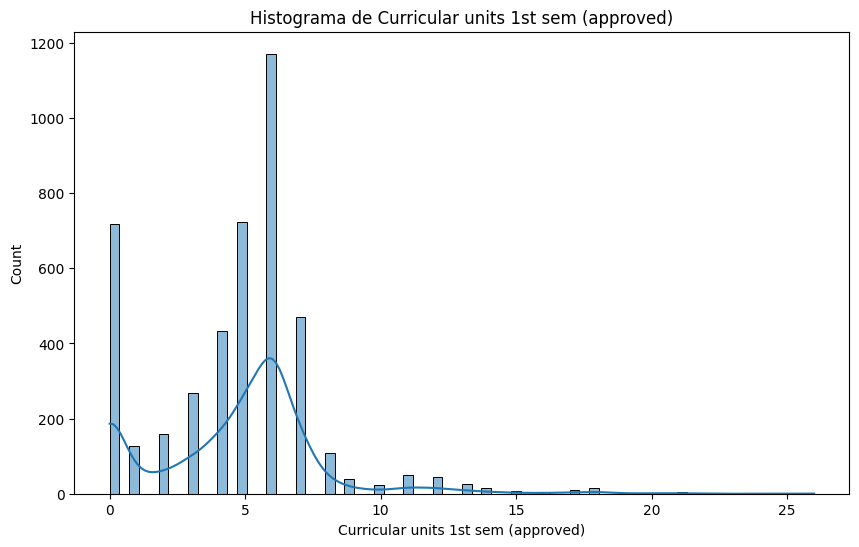

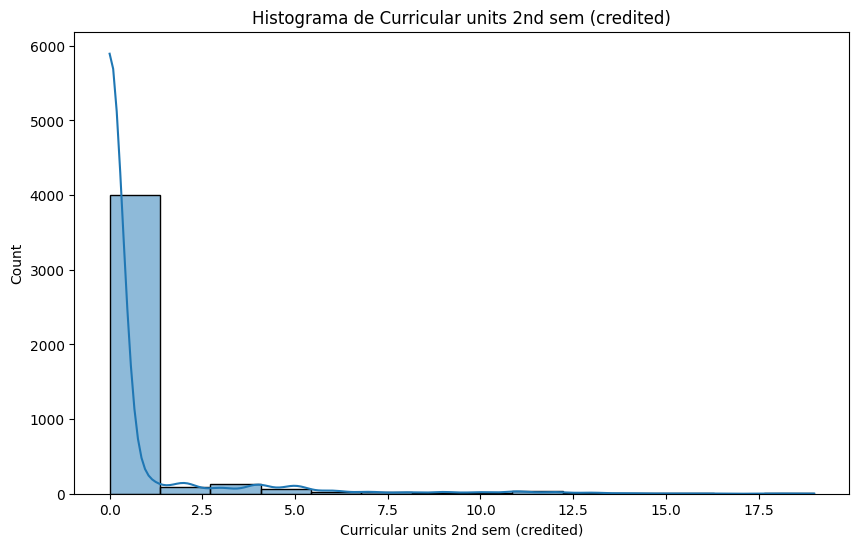

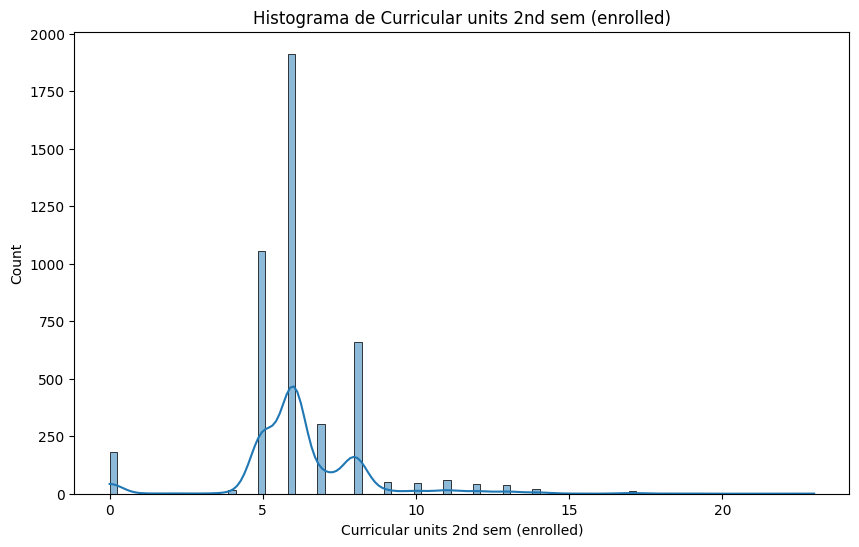

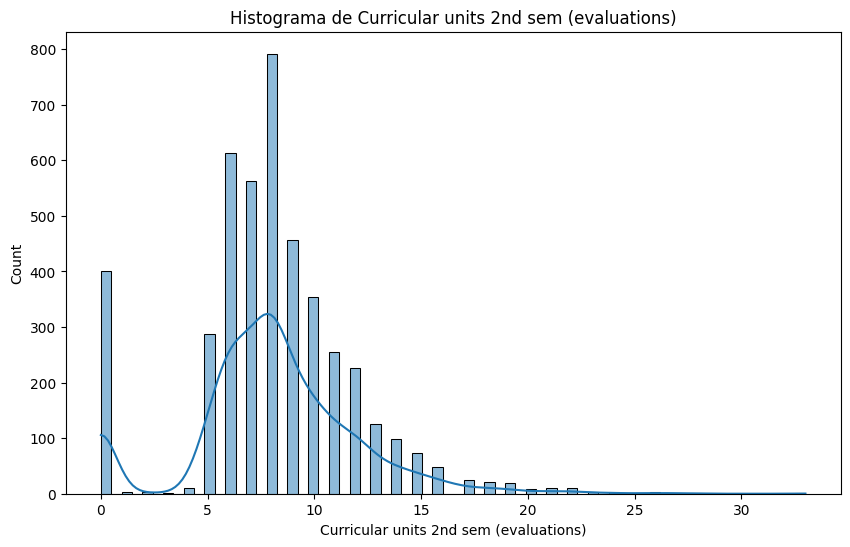

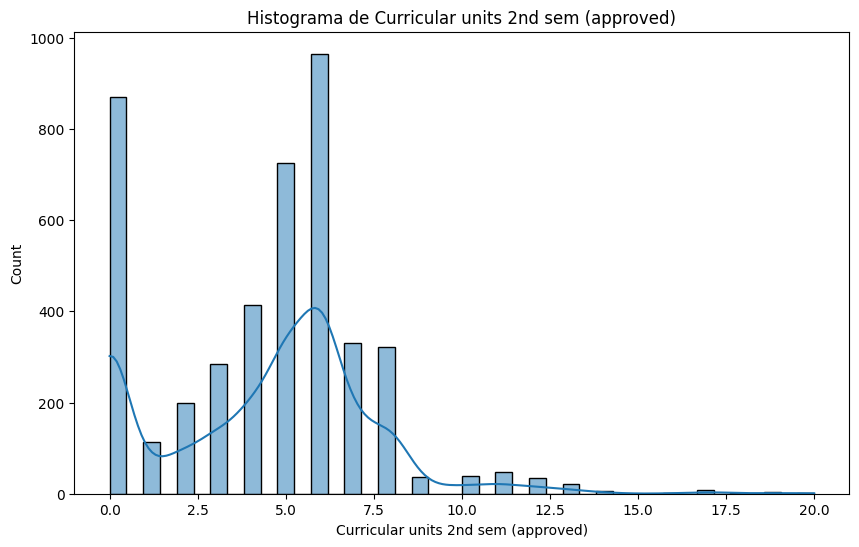

In [13]:
#Exploración gráfica del dataset original de Kaggle
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras para mostrar la distribución de variables categóricas
categorical_columns = ['Marital status', 'Application mode', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', 'Mother\'s qualification', 'Father\'s qualification', 'Mother\'s occupation', 'Father\'s occupation', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=column)
    plt.title(f"Distribución de {column}")
    plt.xticks(rotation=90)
    plt.show()

# Gráfico de histograma para variables numéricas
numeric_columns = ['Application order', 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)']
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=column, kde=True)
    plt.title(f"Histograma de {column}")
    plt.show()

# **PRE-PROCESAMIENTO DE LOS DATOS:**

Teniendo en cuenta las instrucciones del proyecto, el dataset seleccionado ha de cumplir con los siguientes requisitos:

* al menos 5000 instancias (filas, imágenes, etc.)
* al menos 30 columnas
* al menos el 10% de las columnas han de ser categóricas
* al menos ha de tener un 5% de datos faltantes en al menos el 3 columnas.

Hacemos lo siguiente con el dataset cargado desde kaggle:

In [14]:
import os

# Obtener la ruta actual del notebook
current_path = os.getcwd()

# Concatenar la ruta actual con el nombre del archivo
file_path = os.path.join(current_path, 'dataset.csv')

# Imprimir la ruta del archivo
print(file_path)

/content/kaggle-cli/dataset.csv


In [15]:
import pandas as pd
import numpy as np

# cargar el archivo CSV
df = pd.read_csv('/content/kaggle-cli/dataset.csv')

# eliminar datos al azar de las columnas indicadas
columnas = ['Marital status', 'Previous qualification', 'Gender']
porcentaje_faltante = 0.05

for columna in columnas:
    n_filas = len(df)
    n_eliminar = int(n_filas * porcentaje_faltante)
    indices_eliminar = np.random.choice(n_filas, n_eliminar, replace=False)
    df.loc[indices_eliminar, columna] = np.nan

# guardar el archivo modificado
df.to_csv('newdataset.csv', index=False)

In [16]:
import pandas as pd

# cargar el archivo modificado
df_new = pd.read_csv('/content/kaggle-cli/newdataset.csv')

# revisar cantidad de valores faltantes en las columnas de interés
columnas = ['Marital status', 'Previous qualification', 'Gender']
for col in columnas:
    n_missing = df_new[col].isna().sum()
    print(f"La columna {col} tiene {n_missing} valores faltantes.")

La columna Marital status tiene 221 valores faltantes.
La columna Previous qualification tiene 221 valores faltantes.
La columna Gender tiene 221 valores faltantes.


# **ANÁLISIS EXPLORATORIO DE LOS DATOS**

In [17]:
# Importar las bibliotecas necesarias:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Cargar los datos desde el archivo CSV:
df = pd.read_csv('/content/kaggle-cli/newdataset.csv')

In [19]:
# Verificar la estructura de los datos:
df.head() # muestra las primeras filas del dataframe
df.info() # muestra información sobre las columnas y tipos de datos
df.describe() # muestra estadísticas descriptivas de las variables numéricas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4203 non-null   float64
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4203 non-null   float64
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4203.000000,4424.000000,4424.000000,4424.000000,4424.000000,4203.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.175113,6.886980,1.727848,9.899186,0.890823,2.548180,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.601663,5.298964,1.313793,4.331792,0.311897,3.980288,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


<Axes: xlabel='Gender', ylabel='Previous qualification'>

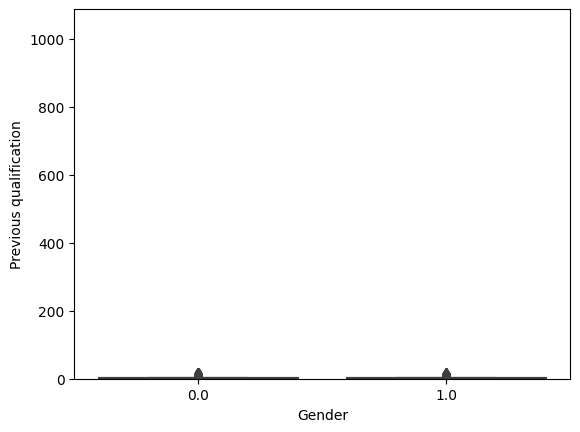

In [20]:
# Visualizar la distribución de los datos:
sns.histplot(df['Age at enrollment'], kde=False) # histograma de la variable Age at enrollment
sns.boxplot(x='Gender', y='Previous qualification', data=df) # diagrama de caja de la variable Calificación por género

<ipython-input-21-20641b3ad26f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True) # mapa de calor de la matriz de correlación entre variables numéricas


<Axes: >

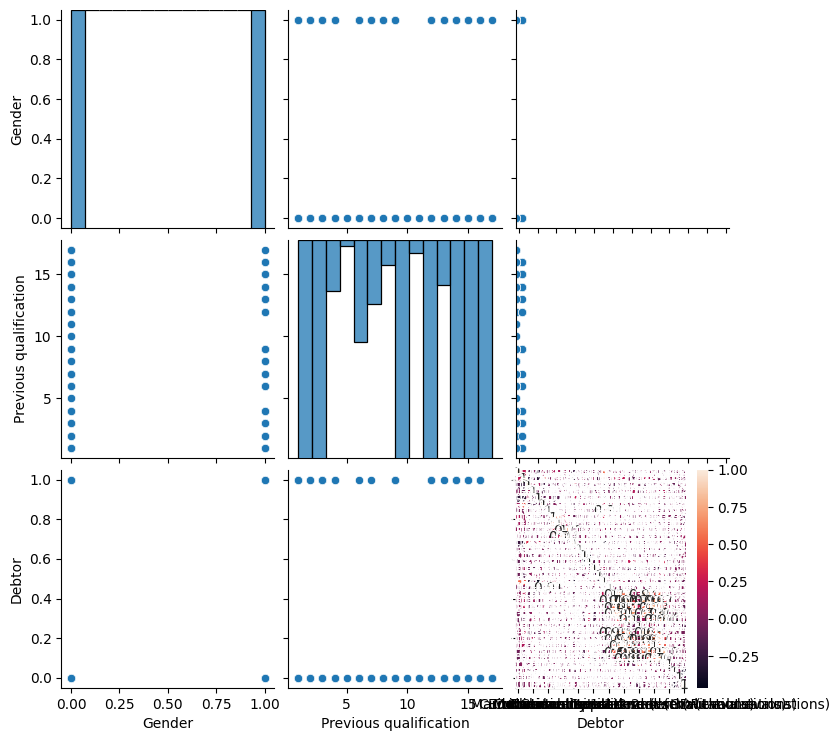

In [21]:
#Explorar relaciones entre variables:
sns.pairplot(df[['Gender', 'Previous qualification', 'Debtor']]) # gráfico de dispersión de las variables Gender, Previous qualification e Debtor
sns.heatmap(df.corr(), annot=True) # mapa de calor de la matriz de correlación entre variables numéricas

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   Marital status  Application mode  Application order  Course  \
0             1.0                 8                  5       2   
1             1.0                 6                  1      11   
2             1.0                 1                  5       5   
3             1.0                 8                  2      15   
4             2.0                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                     1.0            1   
1                           1                     1.0            1   
2                           1                     1.0            1   
3                           1                     1.0            1   
4                           0                     1.0            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1                       

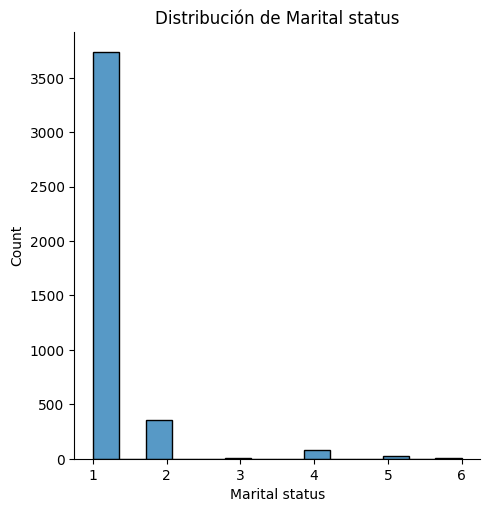

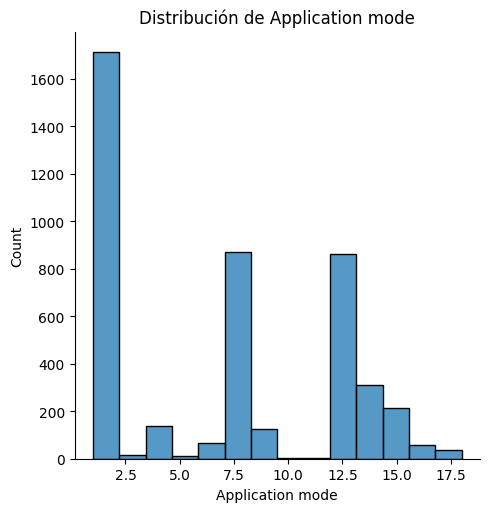

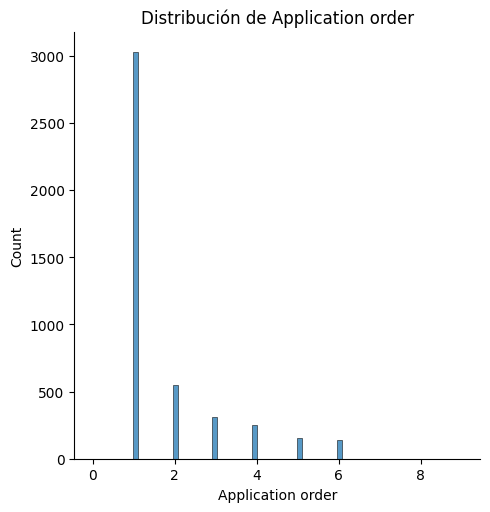

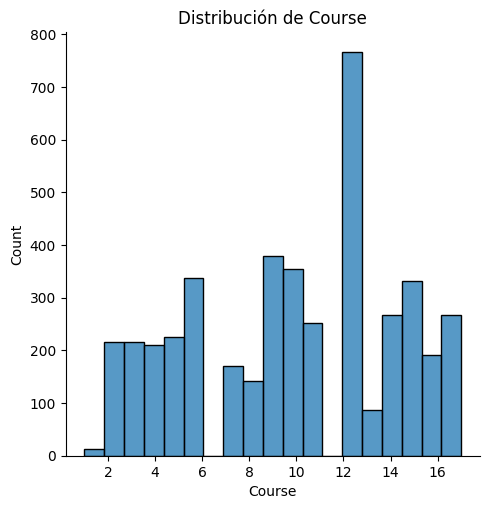

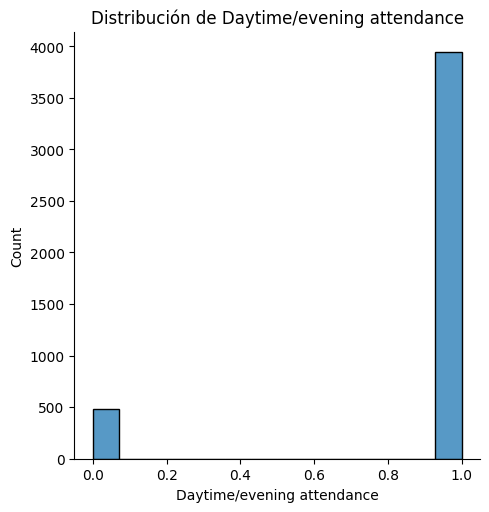

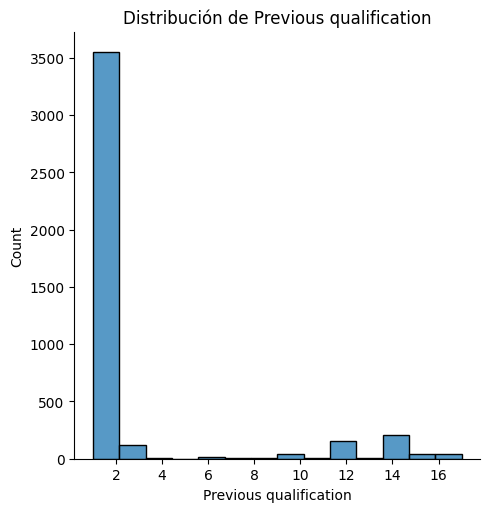

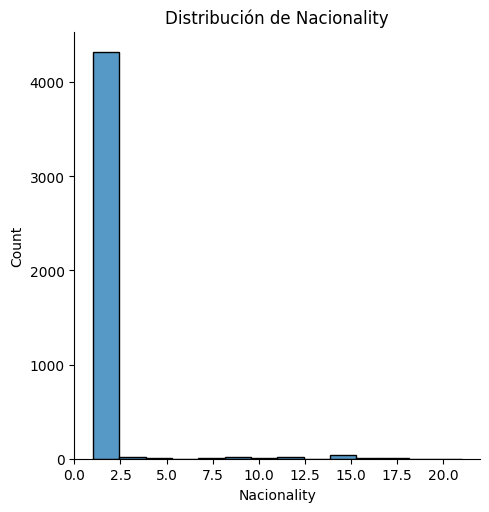

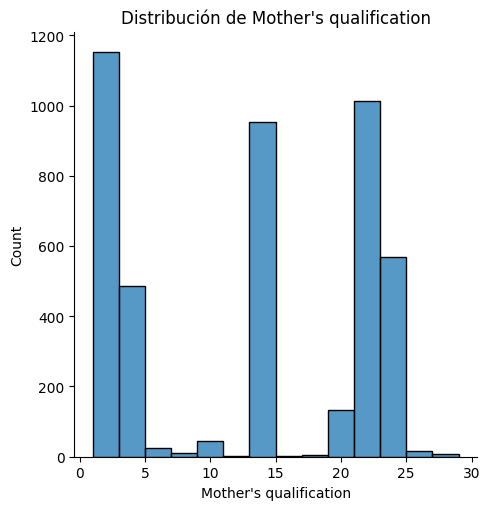

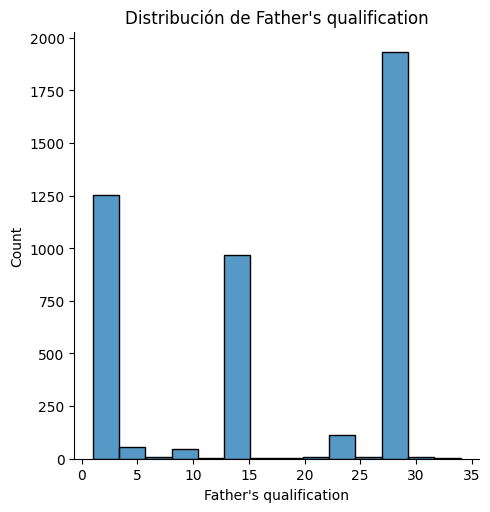

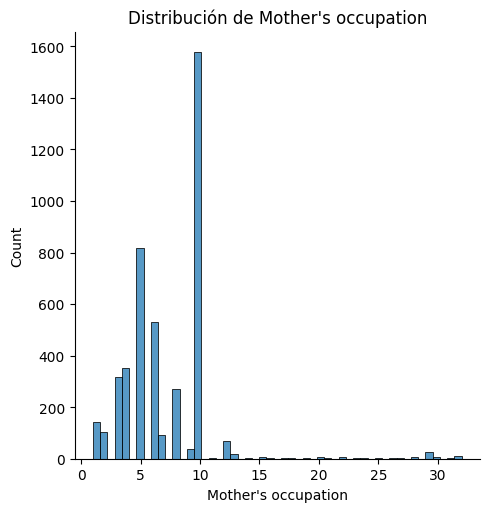

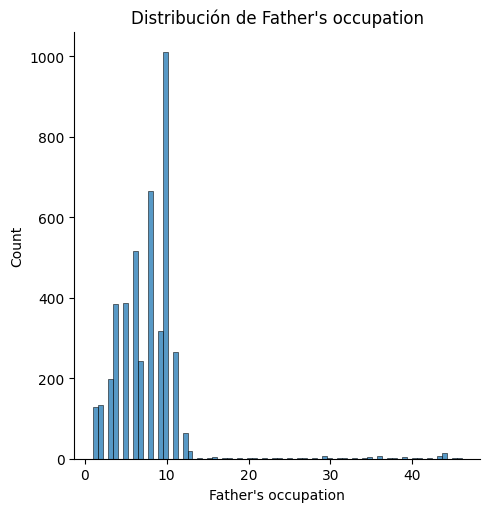

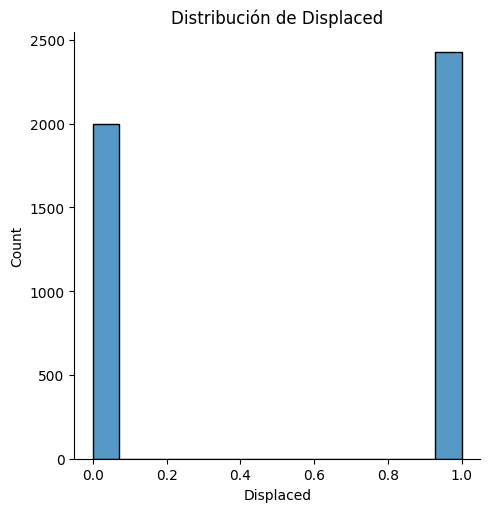

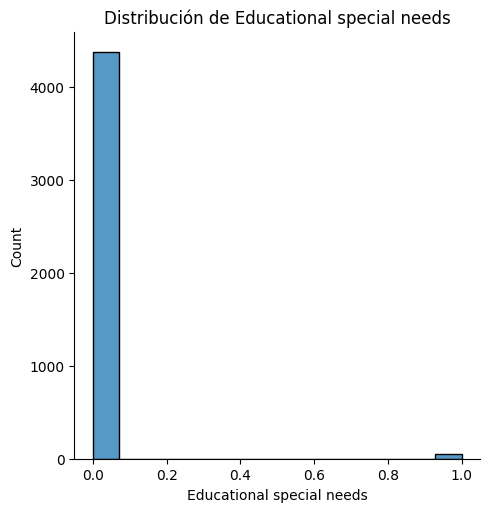

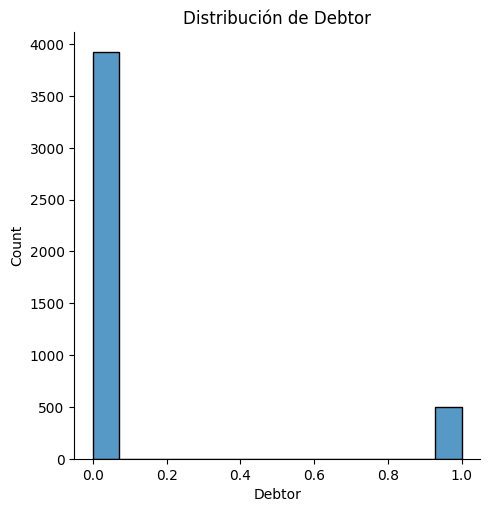

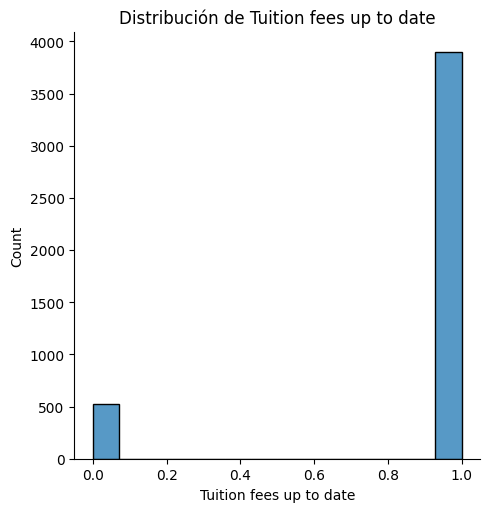

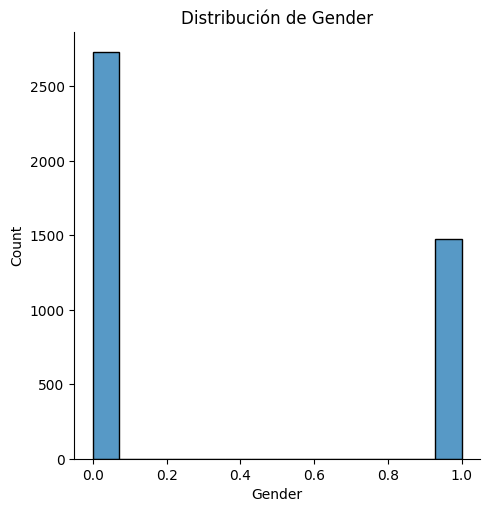

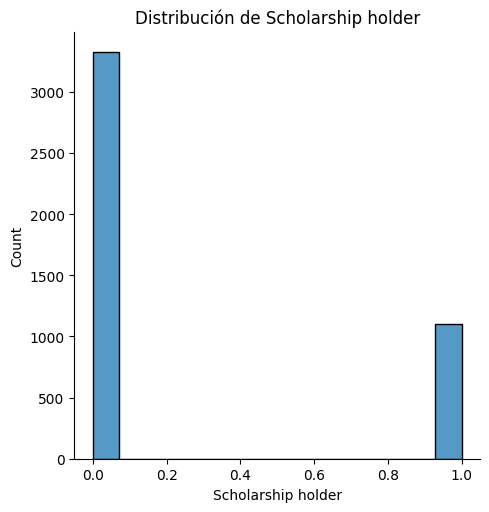

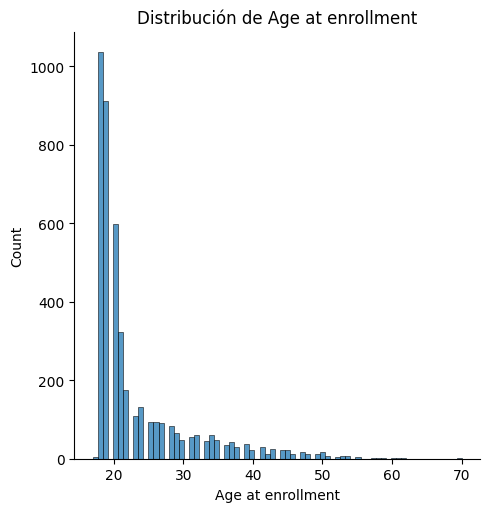

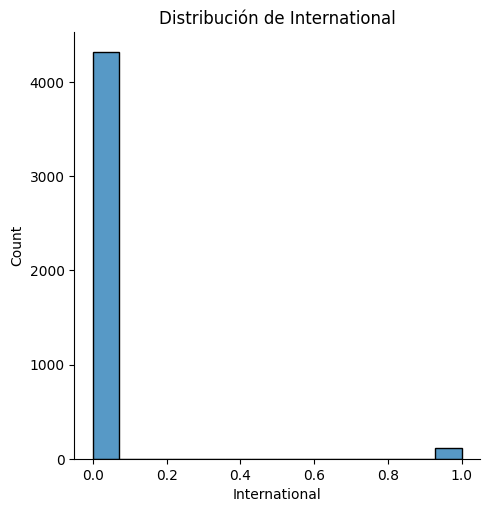

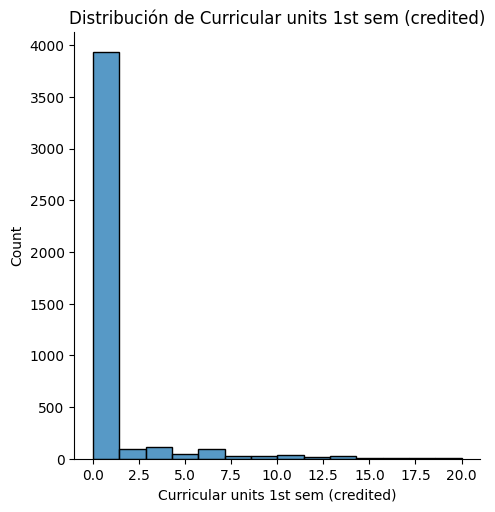

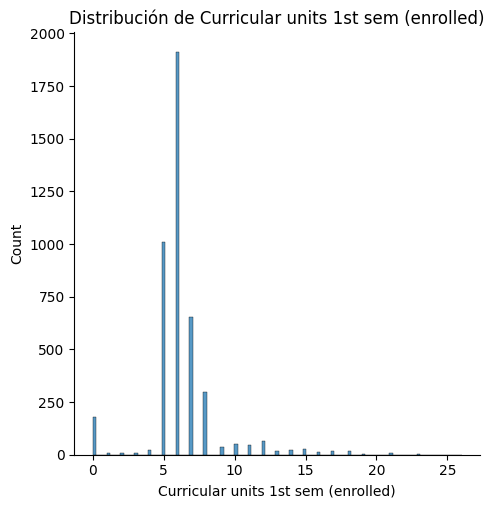

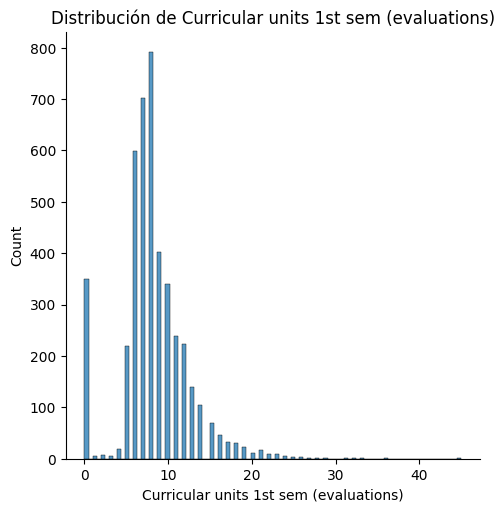

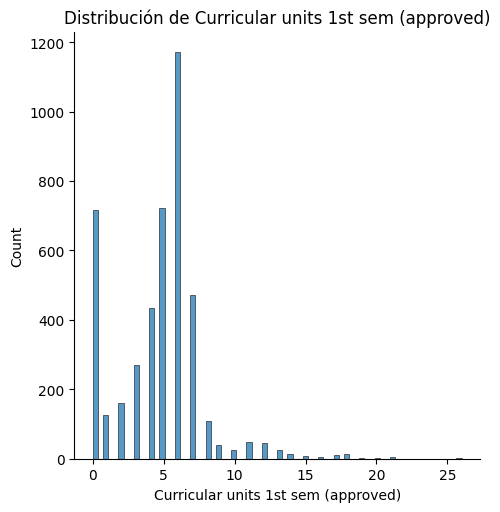

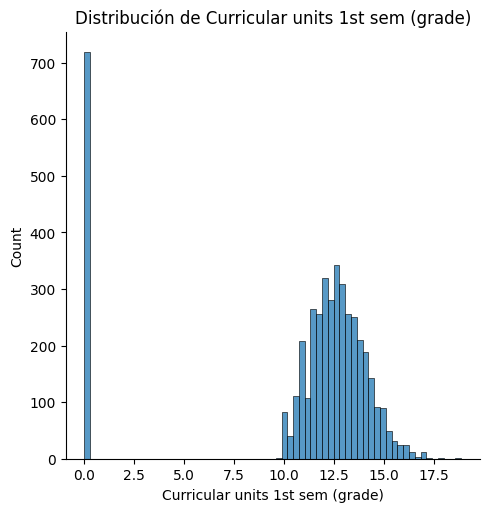

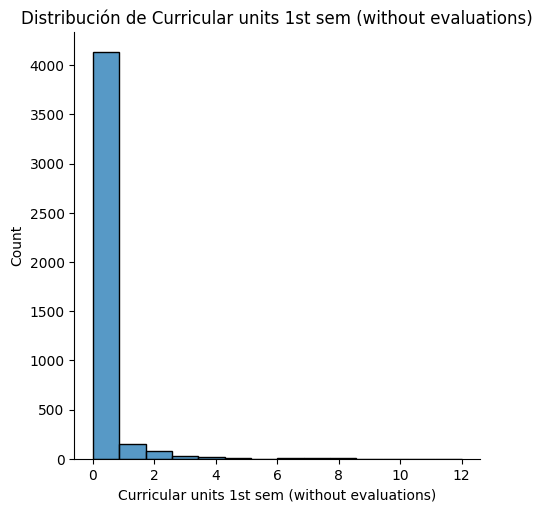

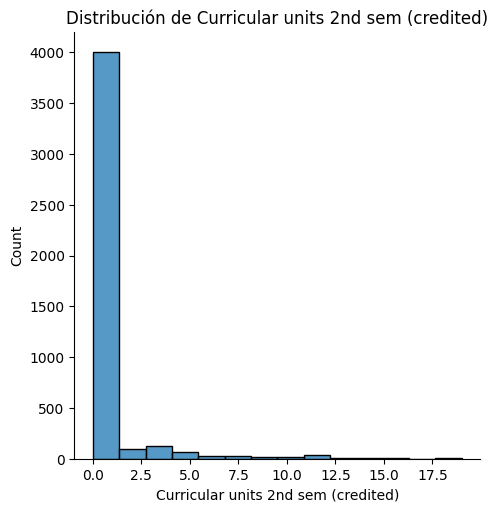

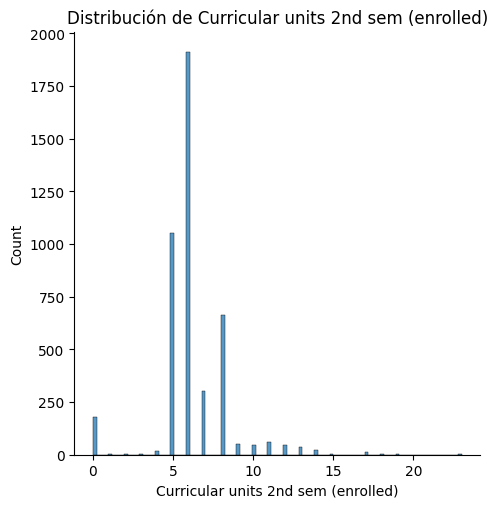

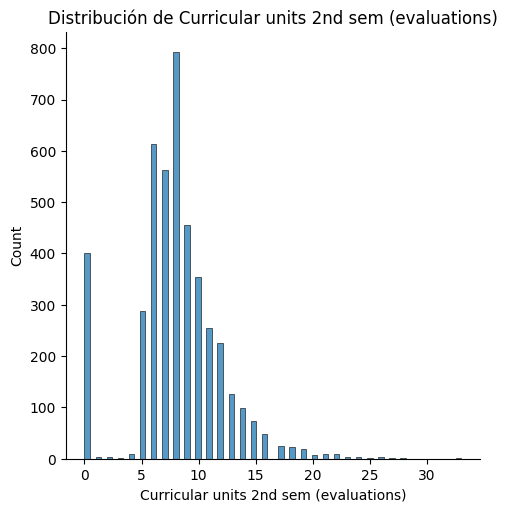

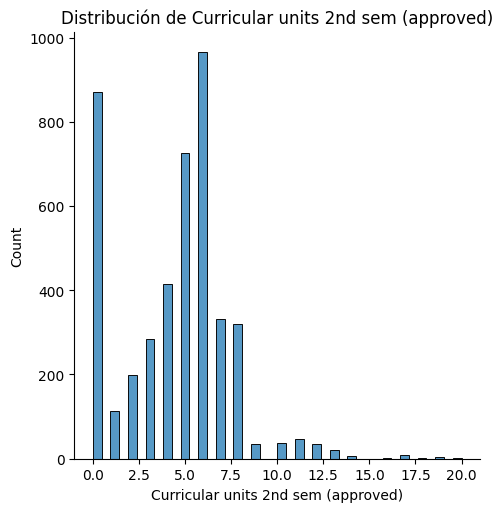

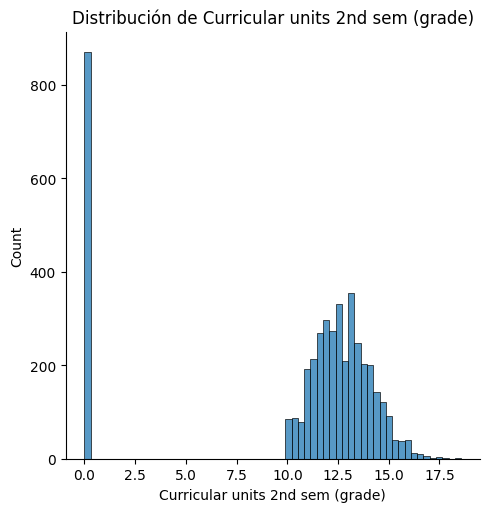

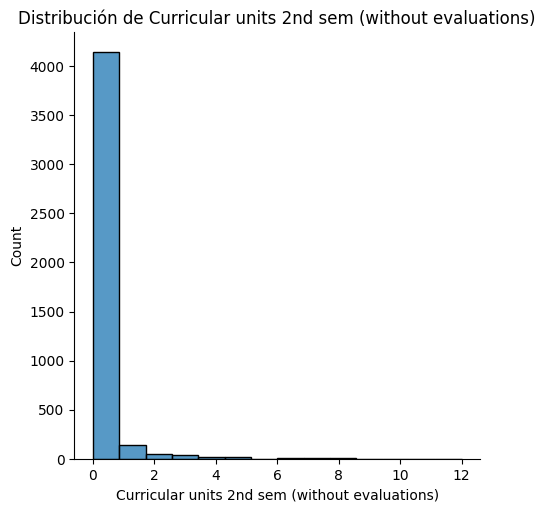

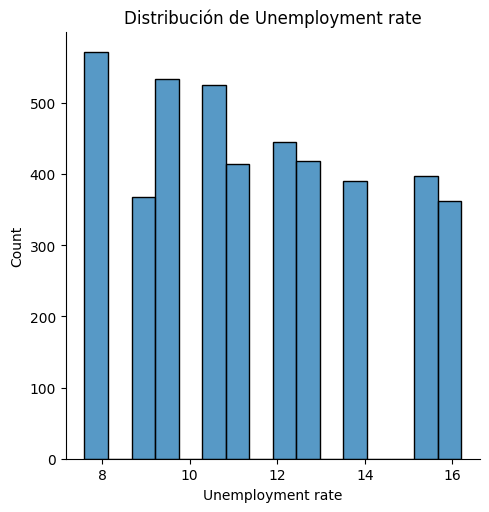

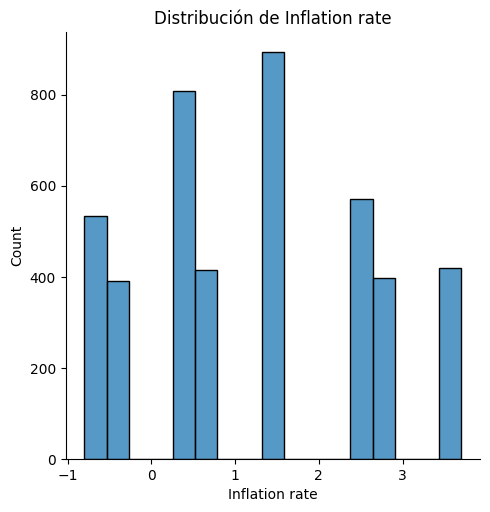

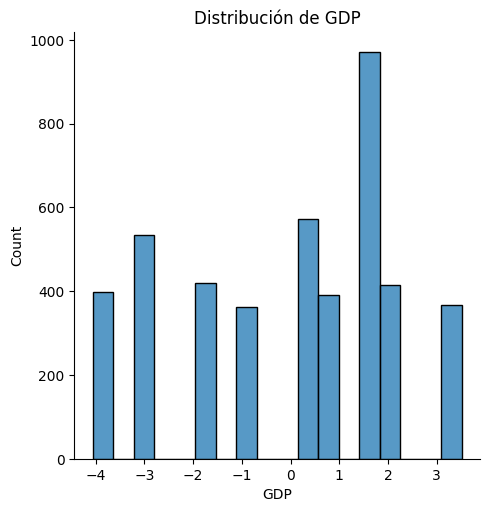

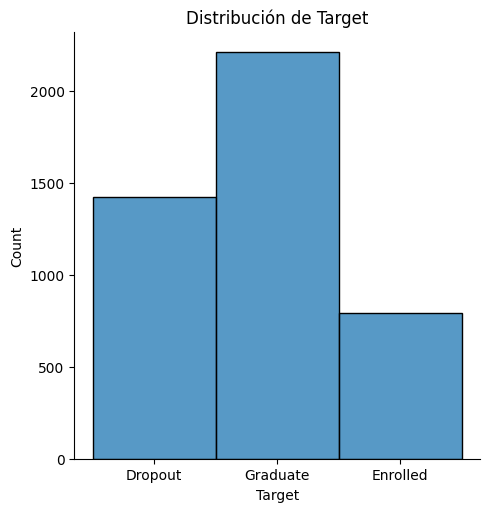

In [23]:
# cargar el archivo CSV
df = pd.read_csv('/content/kaggle-cli/newdataset.csv')

# mostrar las primeras filas del dataset
print(df.head())

# obtener información general del dataset
print(df.info())

# obtener estadísticas descriptivas del dataset
print(df.describe())

# obtener la distribución de cada variable
for col in df.columns:
    sns.displot(df[col])
    plt.title(f"Distribución de {col}")
    plt.show()

# `**MODELO DE PREDICCIÓN USANDO CLASIFICACIÓN RANDOMFORESTCLASSIFIER**`


Se utiliza el modelo de clasificación RandomForestClassifier para realizar la predicción. Es un algoritmo de aprendizaje automático basado en el ensamblaje de árboles de decisión aleatorios.

Los datos se dividieron en conjuntos de entrenamiento y prueba utilizando la función train_test_split de la biblioteca scikit-learn. Esta función permite realizar una división aleatoria de los datos en subconjuntos de entrenamiento y prueba. 

Mediante la línea X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42), 

X_imputed representa las características del dataset con los datos faltantes completados utilizando la técnica del promedio, y y representa la variable objetivo "Target". Se utiliza un test_size de 0.2, lo que implica que el 20% de los datos se utilizarán como conjunto de prueba y el 80% restante se utilizará como conjunto de entrenamiento. El parámetro random_state se establece en 42 para garantizar la reproducibilidad de la división de los datos.

Después de dividir los datos, se utilizan X_train y y_train como el conjunto de entrenamiento para entrenar el modelo, y X_test se utiliza como el conjunto de prueba para evaluar el rendimiento del modelo.




In [31]:
import pandas as pd

# Cargar el dataset original desde el archivo CSV
dataset = pd.read_csv("/content/kaggle-cli/newdataset.csv")

# Crear la columna "Target" en el dataset
dataset["Target"] = ""

# Aplicar la lógica para asignar la categoría a cada estudiante
# Puedes utilizar condiciones y reglas según los atributos y características disponibles en tu dataset
# Por ejemplo:
# Si el estudiante es un deudor y tiene tasas de matrícula al día, se considera "matriculado"
# Si el estudiante tiene una cualificación previa y unidades curriculares aprobadas en al menos un semestre, se considera "graduado"
# Si ninguna de las condiciones anteriores se cumple, se considera "abandono"
dataset.loc[(dataset["Debtor"] == "Yes") & (dataset["Tuition fees up to date"] == "Yes"), "Target"] = "matriculado"
dataset.loc[(dataset["Previous qualification"].notnull()) & ((dataset["Curricular units 1st sem (approved)"] > 0) | (dataset["Curricular units 2nd sem (approved)"] > 0)), "Target"] = "graduado"
dataset.loc[dataset["Target"] == "", "Target"] = "abandono"

# Guardar el dataset modificado en un nuevo archivo CSV
dataset.to_csv("/content/kaggle-cli/newdataset_modified.csv", index=False)

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Cargar el dataset modificado desde el archivo CSV
dataset = pd.read_csv("/content/kaggle-cli/newdataset_modified.csv")

# Separar los datos en características (X) y variable objetivo (y)
X = dataset.drop("Target", axis=1)
y = dataset["Target"]

# Codificar las etiquetas de manera numérica
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Completar los datos faltantes con el promedio de cada columna
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Crear y entrenar el modelo de clasificación
model = RandomForestClassifier(random_state=42)
model.fit(X_train_imputed, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_imputed)

# Calcular la precisión del modelo en porcentaje
accuracy = accuracy_score(y_test, y_pred) * 100

# Calcular el área bajo la curva (AUC)
auc = roc_auc_score(y_test, y_pred)

print("Precisión del modelo: %.2f%%" % accuracy)
print("Área bajo la curva (AUC): %.2f" % auc)

Precisión del modelo: 99.10%
Área bajo la curva (AUC): 0.98


# **MODELO DE REGRESIÓN LOGÍSTICA (LOGISTICREGRESSION) ** 

Se ha utiliza el modelo de Regresión Logística (LogisticRegression) en lugar del modelo de Bosques Aleatorios. El resto del código es similar al anterior, realizando el preprocesamiento de datos, entrenando el modelo, haciendo predicciones y calculando la precisión y el AUC del modelo de Regresión Logística.

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Cargar el dataset modificado desde el archivo CSV
dataset = pd.read_csv("/content/kaggle-cli/newdataset_modified.csv")

# Separar los datos en características (X) y variable objetivo (y)
X = dataset.drop("Target", axis=1)
y = dataset["Target"]

# Codificar las etiquetas de manera numérica
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Completar los datos faltantes con el promedio de cada columna
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Crear y entrenar el modelo de Regresión Logística
model = LogisticRegression(random_state=42)
model.fit(X_train_imputed, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_imputed)

# Calcular la precisión del modelo en porcentaje
accuracy = accuracy_score(y_test, y_pred) * 100

# Calcular el área bajo la curva (AUC)
auc = roc_auc_score(y_test, y_pred)

print("Precisión del modelo de Regresión Logística: %.2f%%" % accuracy)
print("Área bajo la curva (AUC) del modelo de Regresión Logística: %.2f" % auc)

Precisión del modelo de Regresión Logística: 94.80%
Área bajo la curva (AUC) del modelo de Regresión Logística: 0.88


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Se utilizan los modelos de Bosques Aleatorios (RandomForestClassifier) y Regresión Logística (LogisticRegression) para hacer predicciones en el conjunto de prueba (X_test_imputed). Luego, se genera un informe de clasificación utilizando la función classification_report para cada modelo, comparando las predicciones con las etiquetas verdaderas (y_test). Este informe proporciona métricas como precisión, recall, F1-score y soporte para cada clase de la variable objetivo. Puedes utilizar este informe para comparar el desempeño de los dos modelos en términos de sus predicciones.

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

# Cargar el dataset modificado desde el archivo CSV
dataset = pd.read_csv("/content/kaggle-cli/newdataset_modified.csv")

# Separar los datos en características (X) y variable objetivo (y)
X = dataset.drop("Target", axis=1)
y = dataset["Target"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Completar los datos faltantes con el promedio de cada columna
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Crear y entrenar el modelo de Bosques Aleatorios
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_imputed, y_train)

# Realizar predicciones con el modelo de Bosques Aleatorios
y_pred_random_forest = random_forest_model.predict(X_test_imputed)

# Crear y entrenar el modelo de Regresión Logística
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X_train_imputed, y_train)

# Realizar predicciones con el modelo de Regresión Logística
y_pred_logistic_regression = logistic_regression_model.predict(X_test_imputed)

# Comparar las predicciones
print("Informe de clasificación para el modelo de Bosques Aleatorios:")
print(classification_report(y_test, y_pred_random_forest))

print("Informe de clasificación para el modelo de Regresión Logística:")
print(classification_report(y_test, y_pred_logistic_regression))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Informe de clasificación para el modelo de Bosques Aleatorios:
              precision    recall  f1-score   support

    abandono       1.00      0.95      0.98       174
    graduado       0.99      1.00      0.99       711

    accuracy                           0.99       885
   macro avg       0.99      0.98      0.99       885
weighted avg       0.99      0.99      0.99       885

Informe de clasificación para el modelo de Regresión Logística:
              precision    recall  f1-score   support

    abandono       0.96      0.76      0.85       174
    graduado       0.95      0.99      0.97       711

    accuracy                           0.95       885
   macro avg       0.95      0.88      0.91       885
weighted avg       0.95      0.95      0.95       885

